In [1]:
import datetime as dt, numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy.stats as scs

In [3]:
n_simulation = 100000
rfr = 0
time = 30
std_dev = 0.25
Stock_Price = 1

In [4]:
d = (rfr - 0.5 * std_dev ** 2) * (time/252)
a = std_dev * np.sqrt(time/252)
r = np.random.normal(0, 1, (n_simulation,1))

# dt is equal to time divided by the number of trading days, GBM is Geometric Brownian Motion

GBM_Returns = Stock_Price * np.exp(d + a*r)

In [5]:
r

array([[ 1.41841066],
       [ 0.86138205],
       [-0.10006461],
       ...,
       [-0.92117224],
       [ 1.22094764],
       [-0.00353646]])

In [6]:
len(r)

100000

In [8]:
GBM_Returns

array([[1.12595246],
       [1.07313151],
       [0.98772434],
       ...,
       [0.92018652],
       [1.10693673],
       [0.9959828 ]])

In [9]:
len(GBM_Returns)

100000

In [11]:
Confidence_Interval = [0.01, 0.1, 1.0, 2.5, 5.0, 10]
var = scs.scoreatpercentile(GBM_Returns - 1, Confidence_Interval)
var

array([-0.28832105, -0.23853171, -0.18518822, -0.15937408, -0.13604171,
       -0.10787621])

In [13]:
df = pd.DataFrame(var, Confidence_Interval, columns = ['var'])
df

,var
0.01,-0.288321
0.10,-0.238532
1.00,-0.185188
2.50,-0.159374
5.00,-0.136042
10.00,-0.107876


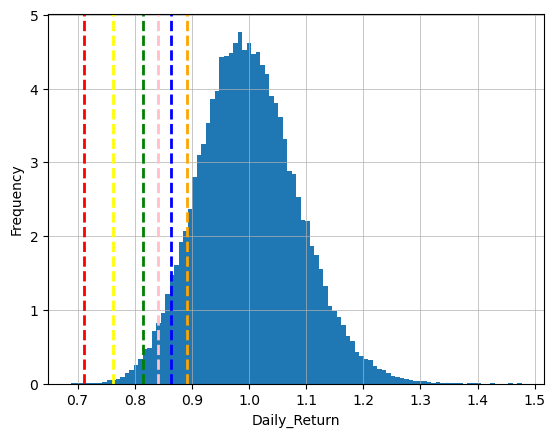

In [20]:
plt.hist(GBM_Returns, density = True, bins = 100)

plt.axvline(df.loc[0.01]['var'] + 1, color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(df.loc[0.1]['var'] + 1, color = 'yellow', linestyle = 'dashed', linewidth = 2)
plt.axvline(df.loc[1.0]['var'] + 1, color = 'green', linestyle = 'dashed', linewidth = 2)
plt.axvline(df.loc[2.5]['var'] + 1, color = 'pink', linestyle = 'dashed', linewidth = 2)
plt.axvline(df.loc[5.0]['var'] + 1, color = 'blue', linestyle = 'dashed', linewidth = 2)
plt.axvline(df.loc[10.0]['var'] + 1, color = 'orange', linestyle = 'dashed', linewidth = 2)

plt.ylabel('Frequency')
plt.xlabel('Daily_Return')
plt.grid(True, linewidth = 0.5)

plt.show()